loss_fn = 80.36434545454544
loss_fn = 37.57491443720965
loss_fn = 30.871081493991234
loss_fn = 29.756196009195058
loss_fn = 29.507148000491885
loss_fn = 29.39245416713703
loss_fn = 29.298826583908706
loss_fn = 29.208719127832033
loss_fn = 29.119413503209987
loss_fn = 29.030487848051678
loss_fn = 28.94187595900097
loss_fn = 28.853566717584552
loss_fn = 28.765557539430105
loss_fn = 28.67784716479513
loss_fn = 28.59043454200423
loss_fn = 28.50331865451376
loss_fn = 28.416498494118954
loss_fn = 28.329973056794543
loss_fn = 28.243741342040803
loss_fn = 28.157802352772514
loss_fn = 28.072155095292
loss_fn = 27.986798579275263
loss_fn = 27.901731817760194
loss_fn = 27.816953827135034
loss_fn = 27.732463627127036
loss_fn = 27.64826024079117
loss_fn = 27.564342694498738
loss_fn = 27.48071001792614
loss_fn = 27.39736124404375
loss_fn = 27.314295409104588
loss_fn = 27.23151155263327
loss_fn = 27.149008717414873
loss_fn = 27.066785949483894
loss_fn = 26.98484229811317
loss_fn = 26.90317681580293
l

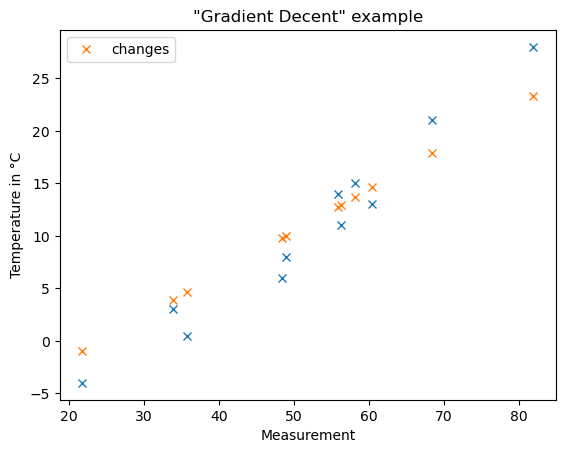

loss_fn =  7.843380301421292


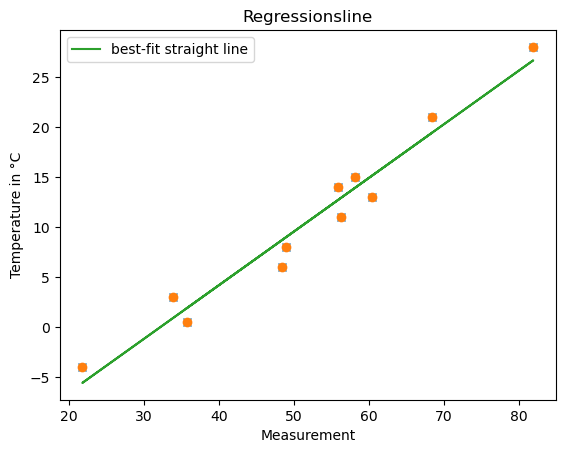

In [1]:
import numpy as np
import matplotlib.pyplot as plt

########################################
# TEIL 1
########################################

values = np.loadtxt('vl5_data.csv')
t_u = np.array(values[:,1])
t_c = np.array(values[:,0])

def model(t_u, w, b):
    return w * t_u + b

def loss_fn(t_p, t_c):
    sq_diff = (t_p - t_c)**2
    return sq_diff.mean()

def dloss_fn(t_p, t_c):
    return 2*(t_p-t_c) / t_p.size

def dmodel_dw(t_u, w, b):
    return t_u

def dmodel_db(t_u, w, b):
    return 1.0

def grad_fn(t_u, t_c, t_p, w, b):
    dloss_dtp = dloss_fn(t_p, t_c)
    dloss_dw = dloss_dtp * dmodel_dw(t_u, w, b)
    dloss_db = dloss_dtp * dmodel_db(t_u, w, b)
    return np.array([dloss_dw.sum(), dloss_db.sum()])

def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    for i in range(n_epochs):
        t_p = model(t_u, *params)
        print(f'loss_fn = {loss_fn(t_p, t_c)}')
        grad = grad_fn(t_u, t_c, t_p, *params)
        params = params - learning_rate * grad
    return params

w = np.ones(1)
b = np.zeros(1)
learning_rate = 1e-2

t_un = t_u * 0.1
params = training_loop(500, learning_rate, np.array([w, b]).flatten(), t_un, t_c)

t_p = model(t_un, *params)
plt.plot(t_u, t_c, 'x')
plt.plot(t_u, t_p, 'x', label="changes")
plt.title('"Gradient Decent" example')
plt.xlabel('Measurement')
plt.ylabel('Temperature in °C')
plt.legend(loc="upper left")
plt.show()
print('loss_fn = ',loss_fn(t_p, t_c))

########################################
# TEIL 2
########################################
x = values[:,1]
y = values[:,0]
plt.plot(x, y, 'x')
plt.title('Regressionsline')
plt.xlabel('Measurement')
plt.ylabel('Temperature in °C')

# linear regression
m, b = np.polyfit(x, y, 1) #m = slope, b = intercept
plt.plot(x, y, 'o') #create scatter plot.
plt.plot(x, m*x + b,label="best-fit straight line") #add line of best fit.
plt.legend(loc="upper left")
